# Actors relationship by realisator
The goal here is to visualize the relationship of actors by seeing if they worked with the same realisator

#### 1/Preparation des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations

nodes_df = pd.read_csv('data/nodes_1980_to_2000.csv')
edges_df = pd.read_csv('data/edges_1980_to_2000.csv')

print(nodes_df.head())
print(edges_df.head())

          Id  category                   Label
0  nm0844752     actor  Rafael Sánchez Navarro
1  nm0194720     actor          Miguel Córcega
2  nm0529960  director       Eva López Sánchez
3  nm0561155     actor      Giovanni Mauriello
4  nm0269416     actor        Gianluca Favilla
      Source     Target  Weight
0  nm0000032  nm0381699       3
1  nm0000041  nm0393094       3
2  nm0000052  nm0147599       3
3  nm0000052  nm0346096       5
4  nm0000052  nm0681566       4


In [2]:
actors = nodes_df[nodes_df['category'] == 'actor']
directors = nodes_df[nodes_df['category'] == 'director']


# Filtrer les arêtes pour ne garder que celles reliant les acteurs aux réalisateurs
actor_director_edges = edges_df[
    edges_df['Source'].isin(actors['Id']) & edges_df['Target'].isin(directors['Id'])
]

In [3]:
# Construire une dictionnaire où chaque réalisateur est lié à une liste des acteurs ayant travaillé avec lui
director_to_actors = {}
for _, row in actor_director_edges.iterrows():
    director = row['Target']
    actor = row['Source']
    
    if director not in director_to_actors:
        director_to_actors[director] = set()
    director_to_actors[director].add(actor)

In [4]:
# Créer des arêtes entre acteurs ayant collaboré avec le même réalisateur
actor_pairs = {}
for actors_set in director_to_actors.values():
    # Créer toutes les paires possibles d'acteurs ayant travaillé avec le même réalisateur
    for actor1, actor2 in combinations(actors_set, 2):
        # Trier les paires pour éviter les doublons
        pair = tuple(sorted([actor1, actor2]))
        
        # Ajouter ou incrémenter le poids de la connexion
        if pair not in actor_pairs:
            actor_pairs[pair] = 0
        actor_pairs[pair] += 1

In [5]:
# Construire le graphe
G = nx.Graph()

# Ajouter les nœuds (uniquement les acteurs)
for actor_id in actors['Id']:
    actor_label = actors[actors['Id'] == actor_id]['Label'].values[0]
    G.add_node(actor_id, label=actor_label)

# Ajouter les arêtes avec le poids correspondant
for (actor1, actor2), weight in actor_pairs.items():
    G.add_edge(actor1, actor2, weight=weight)

In [6]:
# Exporter les données pour Gephi
# Export des nœuds
nodes_export = pd.DataFrame([(n, G.nodes[n]['label']) for n in G.nodes], columns=['Id', 'Label'])
nodes_export.to_csv('gephi/gephi_actors_nodes.csv', index=False)

# Export des arêtes
edges_export = pd.DataFrame([(u, v, G[u][v]['weight']) for u, v in G.edges], columns=['Source', 'Target', 'Weight'])
edges_export.to_csv('gephi/gephi_actors_edges.csv', index=False)

print("Les fichiers CSV pour Gephi ont été exportés avec succès.")

Les fichiers CSV pour Gephi ont été exportés avec succès.


In [12]:
nodes_df = pd.read_csv('gephi/old/gephi_actors_by_real_1960_1980_nodes.csv')
edges_df = pd.read_csv('gephi/old/gephi_actors_by_real_1960_1980_edges.csv')


Statistiques descriptives des poids des arêtes :
count    124741.000000
mean          1.110204
std           0.435829
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          12.000000
Name: Weight, dtype: float64


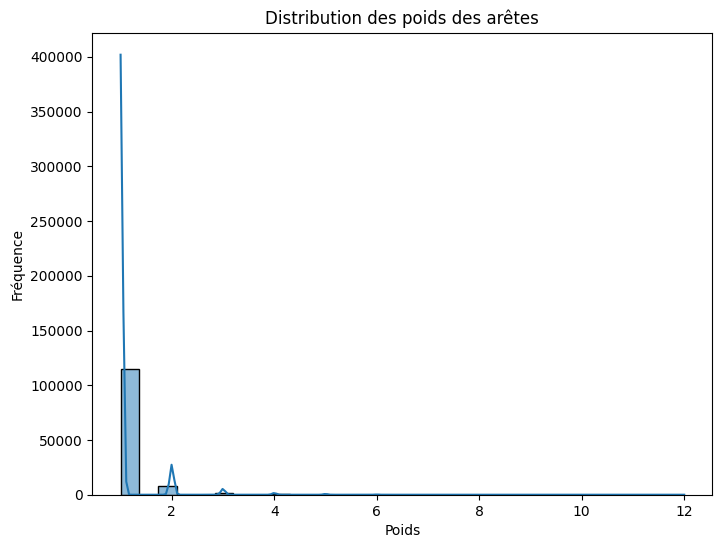

In [13]:
import seaborn as sns
weight_distribution = edges_df['Weight'].describe()
print("\nStatistiques descriptives des poids des arêtes :")
print(weight_distribution)

# Histogramme des poids des arêtes
plt.figure(figsize=(8,6))
sns.histplot(edges_df['Weight'], bins=30, kde=True)
plt.title('Distribution des poids des arêtes')
plt.xlabel('Poids')
plt.ylabel('Fréquence')
plt.show()
